In [2]:
!pip install metpy
!pip install netCDF4
!pip install siphon


  Using cached MetPy-0.12.2-py3-none-any.whl (319 kB)
  Using cached Pint-0.16.1-py2.py3-none-any.whl (205 kB)
  Using cached xarray-0.16.1-py3-none-any.whl (720 kB)
  Using cached pooch-1.2.0-py3-none-any.whl (47 kB)
  Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)
  Using cached netCDF4-1.5.4-cp38-cp38-manylinux1_x86_64.whl (4.3 MB)
  Using cached cftime-1.2.1-cp38-cp38-manylinux1_x86_64.whl (271 kB)
  Using cached siphon-0.8.0-py2.py3-none-any.whl (66 kB)


In [6]:


# import cartopy.crs as ccrs
# import cartopy.feature as cfeature
# import metpy.calc as mpcalc

# from metpy.plots import StationPlot
# from metpy.units import units
# from scipy.ndimage import gaussian_filter
# from siphon.catalog import TDSCatalog

# from netCDF4 import Dataset, num2date


In [114]:
from datetime import datetime, timedelta
from netCDF4 import Dataset, num2date
from calendar import monthrange
from datetime import datetime
import itertools

from netCDF4 import date2num, num2date
import numpy as np
from pyproj import Proj
from siphon.catalog import TDSCatalog
import xarray as xr

import matplotlib.pyplot as plt
import numpy as np

# base_catalog = 'http://www.esrl.noaa.gov/psd/thredds/catalog/Datasets/NARR/pressure/catalog.xml'
base_catalog = 'http://www.esrl.noaa.gov/psd/thredds/catalog/Datasets/NARR/subsurface/catalog.xml'
# base_catalog = 'http://www.esrl.noaa.gov/psd/thredds/catalog/Datasets/NARR/monolevel/catalog.xml'
main_cat = TDSCatalog(base_catalog)

# Spatial location to find stuff
points = [(69 , -135), (70, -134)]
lats, lons = map(np.array, zip(*points))


Subsurface_fields = ['tsoil','soill','soilw']

for year, month, varname in itertools.product(([2017]), range(6, 10),Subsurface_fields):
    
    dsname = '{}.{:4d}{:02d}.nc'.format(varname, year, month)

    if os.path.isfile('Data/Subsurface/'+dsname)==False: 
    
        print('{}: downloading...'.format(dsname), end='')

        # Grab it using opendap--manually convert to CF to work around the
        # fact that missing_value and _FillValue differ
        ds = xr.open_dataset(main_cat.datasets[dsname].access_urls['OPENDAP'],
                             decode_cf=False)
        ds = xr.conventions.decode_cf(ds, mask_and_scale=False)

        # Grab the projection variable and convert our points to that
        # Probably not strictly necessary
        var = varname.split('.')[0]
        proj_var = ds[ds[var].grid_mapping]
        proj = Proj(proj='lcc', lat_0=proj_var.latitude_of_projection_origin,
                lon_0=proj_var.longitude_of_central_meridian,
                lat_1=proj_var.standard_parallel[0],
                lat_2=proj_var.standard_parallel[1],
                x_0=proj_var.false_easting, y_0=proj_var.false_northing,
                ellps='sphere')
        x, y = proj(lons, lats)
        # Subset the data
        print('subsetting...', end='')
    #     ds.
        pt_ds = ds.sel(x=x, y=y, method='nearest')
        print('saving...', end='')

        # Save to disk
        pt_ds.to_netcdf('Data/Subsurface/'+dsname)
        print('done.')

    
    
base_catalog = 'http://www.esrl.noaa.gov/psd/thredds/catalog/Datasets/NARR/monolevel/catalog.xml'
main_cat = TDSCatalog(base_catalog)
Surface_fields = ['air.2m','dswrf','dlwrf','uswrf.ntat','ulwrf.ntat']

for year, varname in itertools.product(([2017]),Surface_fields):
#     # Figure out what to grab

    if os.path.isfile('Data/Surface/'+dsname)==False: 
        dsname = '{}.{:4d}.nc'.format(varname, year)
        print('{}: downloading...'.format(dsname), end='')

        # Grab it using opendap--manually convert to CF to work around the
        # fact that missing_value and _FillValue differ
        ds = xr.open_dataset(main_cat.datasets[dsname].access_urls['OPENDAP'],
                             decode_cf=False)
        ds = xr.conventions.decode_cf(ds, mask_and_scale=False)

        # Grab the projection variable and convert our points to that
        # Probably not strictly necessary
        var = varname.split('.')[0]
        proj_var = ds[ds[var].grid_mapping]
        proj = Proj(proj='lcc', lat_0=proj_var.latitude_of_projection_origin,
                lon_0=proj_var.longitude_of_central_meridian,
                lat_1=proj_var.standard_parallel[0],
                lat_2=proj_var.standard_parallel[1],
                x_0=proj_var.false_easting, y_0=proj_var.false_northing,
                ellps='sphere')
        x, y = proj(lons, lats)
        # Subset the data
        print('subsetting...', end='')
    #     ds.
        pt_ds = ds.sel(x=x, y=y, method='nearest')
        print('saving...', end='')

        # Save to disk
        pt_ds.to_netcdf('Data/Surface/'+dsname)
        print('done.')

air.2m.2017.nc: downloading...subsetting...saving...done.


soill.201709.nc
soill.201708.nc
soilw.201707.nc
soilw.201706.nc
tsoil.201707.nc
tsoil.201706.nc
soill.201707.nc
soill.201706.nc
tsoil.201709.nc
tsoil.201708.nc
soilw.201709.nc
soilw.201708.nc
dlwrf.2017.nc
ulwrf.ntat.2017.nc
dswrf.2017.nc
uswrf.ntat.2017.nc
air.2m.2017.nc
2017-06-01 00:00:00    274.873413
2017-06-01 03:00:00    274.334198
2017-06-01 06:00:00    273.884186
2017-06-01 09:00:00    273.391052
2017-06-01 12:00:00    273.059479
                          ...    
2017-09-30 09:00:00    273.453552
2017-09-30 12:00:00    273.373962
2017-09-30 15:00:00    273.336243
2017-09-30 18:00:00    273.408966
2017-09-30 21:00:00    273.773682
Name: tsoil, Length: 976, dtype: float32


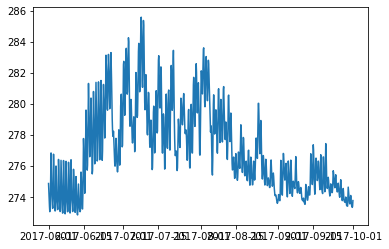

In [118]:
Dir='Data/Subsurface/'
for i,dsname in enumerate(os.listdir(Dir)):
    if "2017" not in dsname:
        print('No')
    else:
        print(dsname)
        fh = Dataset(Dir+dsname, mode='r')
        time=fh.variables['time'][:]
        lons = fh.variables['lon'][:]
        lats = fh.variables['lat'][:]
        var = dsname.split('.')[0]
        query = fh.variables[var][:]
#         print(query[:,0,:,:].mean(axis=(1,2)).mean()-273.15)
#         print(query[:,-1,:,:].mean(axis=(1,2)).mean()-273.15)
        fh.close()
        if i == 0:
            Data = pd.DataFrame(data={var:query[:,0,:,:].mean(axis=(1,2))},
                            index=datetime(1800,1,1)+timedelta(hours=1)*time)
        else:
            Data = Data.append(pd.DataFrame(data={var:query[:,0,:,:].mean(axis=(1,2))},
                            index=datetime(1800,1,1)+timedelta(hours=1)*time))
            
Dir='Data/Surface/'
for i,dsname in enumerate(os.listdir(Dir)):
    if "2017" not in dsname:
        print('No')
    else:
        print(dsname)
        fh = Dataset(Dir+dsname, mode='r')
        time=fh.variables['time'][:]
        lons = fh.variables['lon'][:]
        lats = fh.variables['lat'][:]
        var = dsname.split('.')[0]
        query = fh.variables[var][:]
#         print(query[:,0,:,:].mean(axis=(1,2)).mean()-273.15)
#         print(query[:,-1,:,:].mean(axis=(1,2)).mean()-273.15)
        fh.close()
        if i == -1:
            Data = pd.DataFrame(data={var:query[:,:,:].mean(axis=(1,2))},
                            index=datetime(1800,1,1)+timedelta(hours=1)*time)
        else:
            Data = Data.append(pd.DataFrame(data={var:query[:,:,:].mean(axis=(1,2))},
                            index=datetime(1800,1,1)+timedelta(hours=1)*time))
# print(Data)
Data.to_csv('CompiledData.csv')
Data=Data.groupby(Data.index).mean()
# Data['soill'].plot()
plt.figure()
plt.plot(Data.index,Data['tsoil'])
# Data['soill']
print(Data['tsoil'].dropna())

In [55]:
# print(datetime(1800,1,1)+timedelta(hours=1)*time)
# Temp = ma.filled(query).mean(axis=(1,2))
# print(type(query[~query.mask]))
# print(ma.getmask(query))
# print(Data.max())
# print(time)
# print(datetime(1800,1,1)+timedelta(hours=time.max()))

dswrf    731.8125
dtype: float32
